<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Seminario_ML/blob/main/2_Aprendizaje_No_Supervisado/1_Reducción_Dimensión.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 align = 'center'> Reducción de dimensión </h1>

La reducción de dimensión es una técnica fundamental en el campo de la ciencia de datos y el aprendizaje automático, que se utiliza para simplificar conjuntos de datos complejos con múltiples variables. Su objetivo principal es reducir el número de variables bajo consideración, sin perder información significativa. Esto es crucial cuando se trabaja con datos de alta dimensionalidad, donde un gran número de características puede llevar a problemas como la maldición de la dimensionalidad, donde el rendimiento de los algoritmos de aprendizaje automático puede verse afectado negativamente.

Las técnicas de reducción de dimensión se pueden clasificar en dos categorías principales: técnicas de selección de características y técnicas de extracción de características. La selección de características implica identificar y conservar un subconjunto de las características originales del conjunto de datos, eliminando aquellas que son irrelevantes o redundantes. Por otro lado, la extracción de características implica transformar el conjunto de características original en un nuevo conjunto de características de menor dimensión, manteniendo tanto como sea posible la información esencial del conjunto original.

Entre las técnicas más comunes de reducción de dimensión se encuentran el Análisis de Componentes Principales (PCA), que transforma las características originales en un nuevo conjunto de variables no correlacionadas llamadas componentes principales, y la Análisis Discriminante Lineal (LDA), que busca maximizar la separabilidad entre diferentes clases de datos. También existen técnicas no lineales como el t-SNE (Stochastic Neighbor Embedding) y el UMAP (Uniform Manifold Approximation and Projection), que son particularmente útiles para la visualización de datos en espacios de baja dimensión.

La reducción de dimensión no solo facilita el procesamiento y análisis de datos, sino que también puede mejorar el rendimiento de los algoritmos de aprendizaje automático al reducir el ruido y la redundancia en los datos. En resumen, es una herramienta poderosa para manejar datos complejos y de gran volumen, permitiendo a los científicos de datos y analistas extraer información útil de manera más eficiente y efectiva.

<h2> Análisis de Componentes Principales </h2>

El análisis de componentes principales (PCA, por sus siglas en inglés) es una técnica estadística utilizada para simplificar la complejidad de conjuntos de datos multivariados, identificando patrones subyacentes y resumiendo la información en nuevas variables llamadas componentes principales. Esta técnica es ampliamente utilizada en diversos campos, desde la biología hasta la ingeniería, para explorar la estructura interna de los datos y reducir su dimensionalidad manteniendo la mayor cantidad posible de información. En este proceso, PCA busca maximizar la varianza de los datos proyectados en nuevas dimensiones ortogonales, lo que facilita la interpretación y el análisis de los conjuntos de datos de alta dimensionalidad.

<img src='img/pca.png' width='1000'>

Fuente: [Matthias Scholz](http://phdthesis-bioinformatics-maxplanckinstitute-molecularplantphys.matthias-scholz.de/)

Sea $\mathbf{X}_{N \text{x} m }$ una matriz en un espacio m-dimensional, y $\mathbf{\tilde{X}}$ su versión estandarizada (restamos la media y dividimos la desviación estandar de cada columna).


**Paso 1:** calcular la matriz de varianzas y covarianzas

$$V\left[ \mathbf{\tilde{X}} \right] = \Sigma = \mathbf{\tilde{X}}^{T} \mathbf{\tilde{X}}$$

**Paso 2:** Encontrar los valores propios y vectores propios de la matriz

$$\Sigma \mathbf{v} = \lambda \mathbf{v}$$

donde $\mathbf{v}$ es un vector propio y $\lambda$ un valor propio. Esto se encuentra resolviendo el sistema de ecuaciones, tal que $det(\Sigma − \lambda I)=0$

**Paso 3:** Encontramos los principales $n$ valores propios y sus respectivos vectores propios (estos son los componentes principales)

$$\{ \lambda^{(1)}, \lambda^{(2)}, ... , \lambda^{(m)} \}, \quad \{\mathbf{v}^{(1)}, \mathbf{v}^{(2)}, ...., \mathbf{v}^{(m)}\}$$

tal que $\lambda^{(1)} > \lambda^{(2)} > ... > \lambda^{(m)}$. Si queremos proyectar la matriz $\mathbf{X}$ sobre un espacio de dimensión $k < m$, tomamos los primeros $k$ valores propios y sus correspondientes vectores propios y creamos la matriz $\mathbf{W} = \{\mathbf{v}^{(1)}, \mathbf{v}^{(2)}, ...., \mathbf{v}^{(k)} \}$

**Paso 4:** Se proyecta la matriz $\mathbf{X}$ sobre $R^{k}$

$$C = \mathbf{\tilde{X}} \mathbf{W}$$

dónde $\mathbf{C}_{N \text{x} k}$ es la matriz reducida.

La varianza explicada por el componente $j$, $var_{j}$, viene dada por

$$var_{j} = \frac{\lambda_{j}}{\sum_{i = 1}^{m} \lambda_{i}}$$

Y $\mathbf{C}$ recupera un porcentaje, $per$, de variación de la matriz original dada por:

$$per = \sum_{i = 1}^{k} var_{i} = \frac{\sum_{i = 1}^{k} \lambda_{i}}{\sum_{i = 1}^{m} \lambda_{i}}$$

<h2> Ejemplo 1: </h2>

In [1]:
import numpy as np
from sklearn import datasets

np.random.seed(42)

# Simular matriz de 20 observaciones y 3 variables
matrix = np.random.rand(20, 3)

# Se estandarizan los datos
mean = np.mean(matrix, axis=0)
std_dev = np.std(matrix, axis=0)
standardized_matrix = (matrix - mean)/std_dev

# Matriz de varianzas y covarianzas
cov_matrix = np.cov(standardized_matrix, rowvar=False)

# Valores propios y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar los valores propios
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Se seleccionan los primeros dos componentes principales
top_k = 2
top_eigenvectors = sorted_eigenvectors[:, :top_k]

# Se proyecta en 2 dimensiones
projected_data = np.dot(standardized_matrix, top_eigenvectors)

In [2]:
print("Matriz inicial:")
print(matrix)
print("\nMatriz estandarizada:")
print(standardized_matrix)
print("\nMatriz de varianzas y covarianzas:")
print(cov_matrix)
print("\nValores propios")
print(sorted_eigenvalues)
print("\nVectores propios")
print(sorted_eigenvectors)
print(f"\nPrincipales {top_k} vectores propios")
print(top_eigenvectors)
print("\nDatos proyectados")
print(projected_data)

Matriz inicial:
[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289]
 [0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378]
 [0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159]
 [0.94888554 0.96563203 0.80839735]
 [0.30461377 0.09767211 0.68423303]
 [0.44015249 0.12203823 0.49517691]
 [0.03438852 0.9093204  0.25877998]
 [0.66252228 0.31171108 0.52006802]
 [0.54671028 0.18485446 0.96958463]
 [0.77513282 0.93949894 0.89482735]
 [0.59789998 0.92187424 0.0884925 ]
 [0.19598286 0.04522729 0.32533033]]

Matriz estandarizada:
[[-0.38064536  1.40884825  0.86343188]
 [ 0.50800745 -0.85873174 -1.07172736]
 [-1.63542858  1.16762755  0.42372385]
 [ 0.94184581 -1.24517874  1.66274722]
 [ 1.43498614 -0.69802724 -0.98494598]
 [-1.13851809 -0.43579138  0.16718538]
 [-0.1

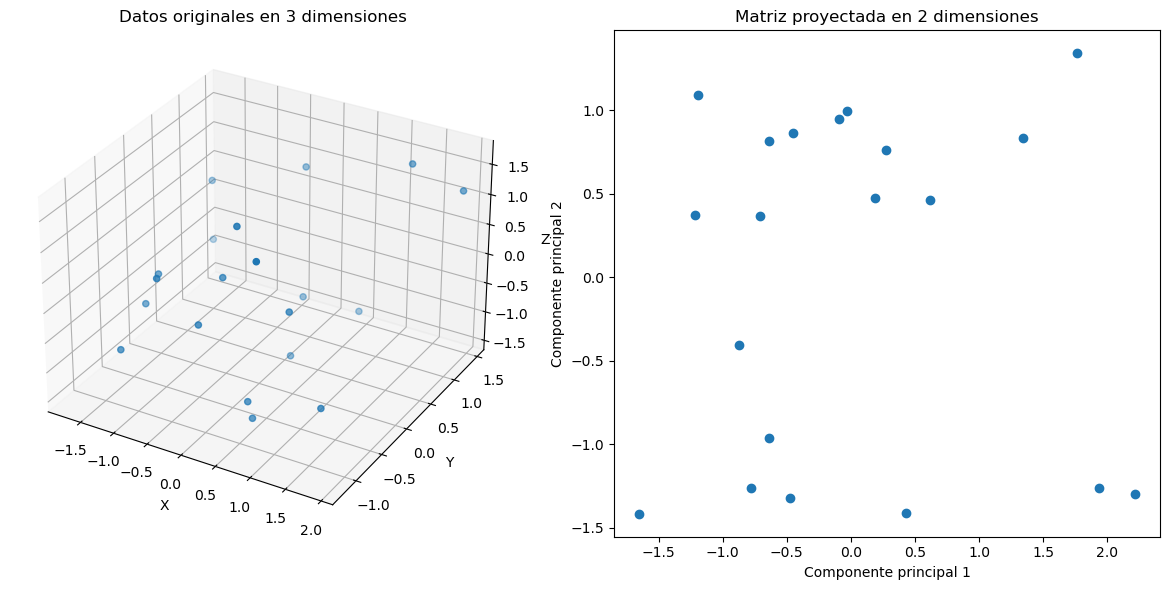

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for the standardized matrix
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')

# Extract coordinates from the standardized matrix
x = standardized_matrix[:, 0]
y = standardized_matrix[:, 1]
z = standardized_matrix[:, 2]

# Plot the points
ax1.scatter(x, y, z)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Datos originales en 3 dimensiones')

# Create a 2D scatter plot for the projected matrix
ax2 = fig.add_subplot(122)
ax2.scatter(projected_data[:, 0], projected_data[:, 1])
ax2.set_xlabel('Componente principal 1')
ax2.set_ylabel('Componente principal 2')
ax2.set_title('Matriz proyectada en 2 dimensiones')

# Show plot
plt.tight_layout()
plt.show()


<AxesSubplot: >

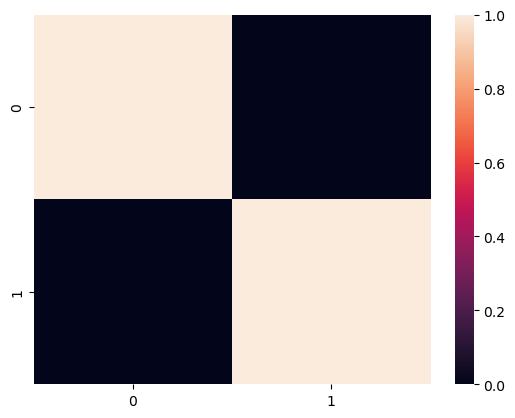

In [4]:
import seaborn as sns

corr = np.corrcoef(projected_data, rowvar=False)

sns.heatmap(corr)

<h2> Ejemplo 2: </h2>

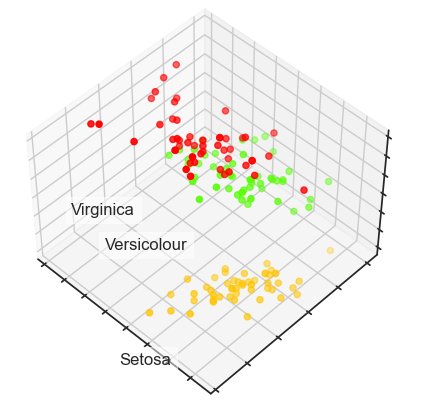

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Let's create a beautiful 3d-plot
fig = plt.figure(figsize=(6, 5))
plt.clf()
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float64)
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr,
           cmap = plt.cm.get_cmap('prism', 3) )

ax.set_xticklabels([]);
ax.set_yticklabels([]);
ax.set_zticklabels([]);

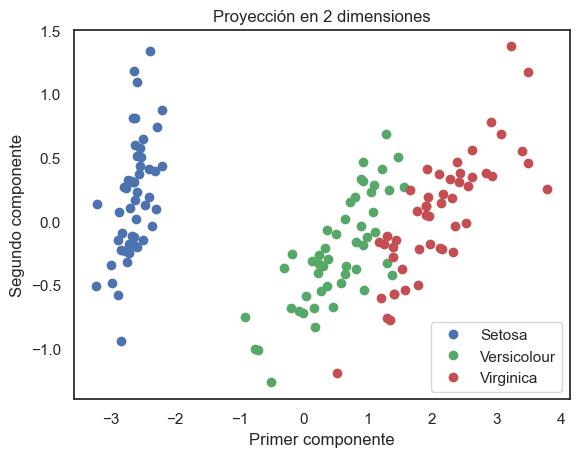

In [6]:
from sklearn import decomposition

# Using PCA from sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Plotting the results of PCA
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)
plt.xlabel('Primer componente')
plt.ylabel('Segundo componente')
plt.title('Proyección en 2 dimensiones');

In [7]:
print('Varianza explicada para cada componente:', pca.explained_variance_ratio_)
print('Porcentaje de variación recuperada:', np.sum(pca.explained_variance_ratio_))

Varianza explicada para cada componente: [0.92461872 0.05306648]
Porcentaje de variación recuperada: 0.9776852063187949


<h2> Ejemplo 3 </h3>

In [8]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.decomposition import PCA

In [9]:
mnist = fetch_openml('mnist_784')

In [10]:
data = mnist['data']
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


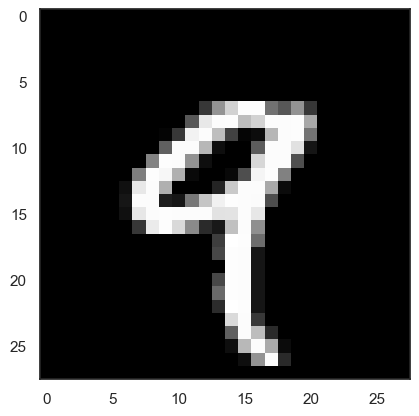

In [11]:
img_1 = data.iloc[4, :].to_numpy().reshape(28, 28)

import matplotlib.pyplot as plt

plt.imshow(img_1, cmap='gray')

In [12]:
def explainedVariance(percentage, images): 

    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

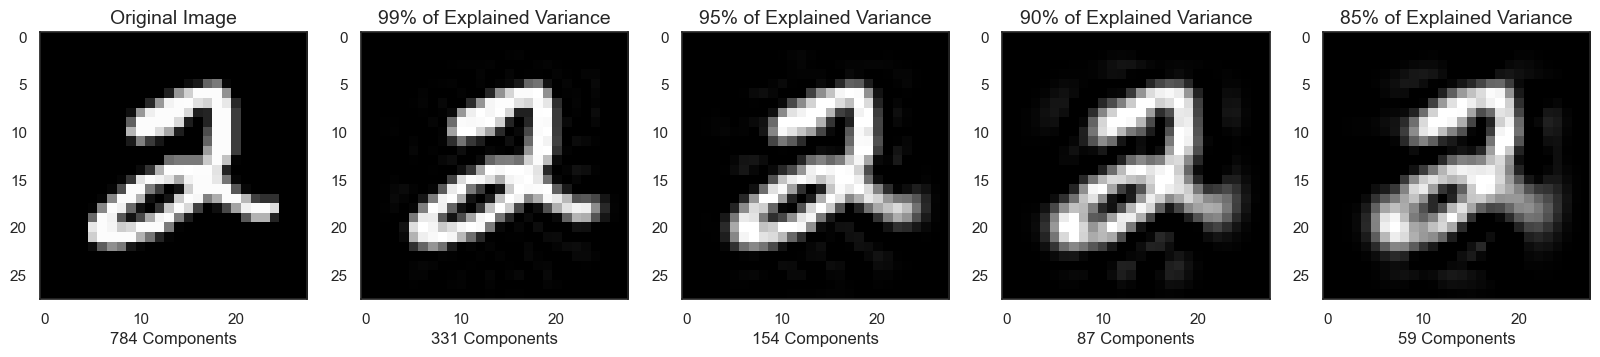

In [13]:
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(mnist.data.iloc[5].to_numpy().reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);

# dígitos: 10; # muestras: 1797; # características 64


NameError: name 'KMeans' is not defined